In [2]:
try:
    env.close()
except:
    pass

import time
from mlagents_envs.environment import UnityEnvironment
from IPython import display
import matplotlib.pyplot as plt
%matplotlib inline

def see_plot(pict, size=(6,6)):
    plt.figure(figsize=size)
    plt.imshow(pict,cmap='gray') #, cmap=color, color='gray'
    plt.show()

#env = UnityEnvironment(file_name="../Builds/RoboDriverLinux_720_360/RoboDriverLinux_720_360")
env = UnityEnvironment(file_name="../Builds/RoboDriverLinux/RoboDriver")

#from mlagents_envs.registry import default_registry
#env_id = 'VisualHallway'
#['VisualHallway','VisualPyramids',VisualFoodCollector','WormStaticTarget','WormDynamicTarget']
#env = default_registry[env_id].make()
env.reset()

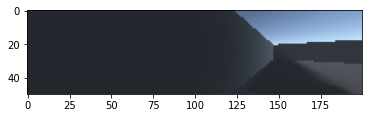

In [3]:
behavior_name = list(env.behavior_specs)[0]
spec = env.behavior_specs[behavior_name]

for episode in range(1):
    env.reset()
    decision_steps, terminal_steps = env.get_steps(behavior_name)
    tracked_agent = -1 # -1 indicates not yet tracking
    done = False # For the tracked_agent
    episode_rewards = 0 # For the tracked_agent
    while not done:
        # Track the first agent we see if not tracking
        # Note : len(decision_steps) = [number of agents that requested a decision]
        if tracked_agent == -1 and len(decision_steps) >= 1:
            tracked_agent = decision_steps.agent_id[0]
        
        display.clear_output(wait=True)
        for index, obs_spec in enumerate(spec.observation_specs):
            if len(obs_spec.shape) == 3:
                see_plot(decision_steps.obs[index][0,:,:,:])

        for index, obs_spec in enumerate(spec.observation_specs):
            if len(obs_spec.shape) == 1:
                print("First vector observations : ", decision_steps.obs[index][0,:])
                
        # Generate an action for all agents
        action = spec.action_spec.random_action(len(decision_steps))
        
        #print(f"Actions: {action.continuous}, {action.discrete}")
        
        # Set the actions
        env.set_actions(behavior_name, action)

        # Move the simulation forward
        env.step()

        # Get the new simulation results
        decision_steps, terminal_steps = env.get_steps(behavior_name)
        if tracked_agent in decision_steps: # The agent requested a decision
            episode_rewards += decision_steps[tracked_agent].reward
        if tracked_agent in terminal_steps: # The agent terminated its episode
            episode_rewards += terminal_steps[tracked_agent].reward
            done = True
            
        #print(f"Total rewards for episode {episode} is {episode_rewards}")
        #print("---------------------------------------------------------")

In [4]:
env.close()
print("Closed environment")

Closed environment


## Additional

In [2]:
# We will only consider the first Behavior
behavior_name = list(env.behavior_specs)[0]
print(f"Name of the behavior : {behavior_name}")
spec = env.behavior_specs[behavior_name]

Name of the behavior : RoboDriver?team=0


In [3]:
# Examine the number of observations per Agent
print("Number of observations : ", len(spec.observation_specs))

# Is there a visual observation ?
# Visual observation have 3 dimensions: Height, Width and number of channels
vis_obs = any(len(spec.shape) == 3 for spec in spec.observation_specs)
print("Is there a visual observation ?", vis_obs)

Number of observations :  1
Is there a visual observation ? True


In [4]:
# Is the Action continuous or multi-discrete ?
if spec.action_spec.continuous_size > 0:
    print(f"There are {spec.action_spec.continuous_size} continuous actions")
if spec.action_spec.is_discrete():
    print(f"There are {spec.action_spec.discrete_size} discrete actions")


# How many actions are possible ?
#print(f"There are {spec.action_size} action(s)")

# For discrete actions only : How many different options does each action has ?
if spec.action_spec.discrete_size > 0:
    for action, branch_size in enumerate(spec.action_spec.discrete_branches):
        print(f"Action number {action} has {branch_size} different options")



There are 1 discrete actions
Action number 0 has 3 different options


#### Get the steps from the Environment
You can do this with the `env.get_steps(behavior_name)` method. If there are multiple behaviors in the Environment, you can call this method with each of the behavior's names.
_Note_ This will not move the simulation forward.

In [27]:
decision_steps, terminal_steps = env.get_steps(behavior_name)

#### Set actions for each behavior
You can set the actions for the Agents of a Behavior by calling `env.set_actions()` you will need to specify the behavior name and pass a tensor of dimension 2. The first dimension of the action must be equal to the number of Agents that requested a decision during the step.

In [28]:
env.set_actions(behavior_name, spec.action_spec.empty_action(len(decision_steps)))

#### Move the simulation forward
Call `env.step()` to move the simulation forward. The simulation will progress until an Agent requestes a decision or terminates.

In [29]:
env.step()

### Observations

#### Show the observations for one of the Agents
`DecisionSteps.obs` is a tuple containing all of the observations for all of the Agents with the provided Behavior name.
Each value in the tuple is an observation tensor containing the observation data for all of the agents.

Here is the first visual observation


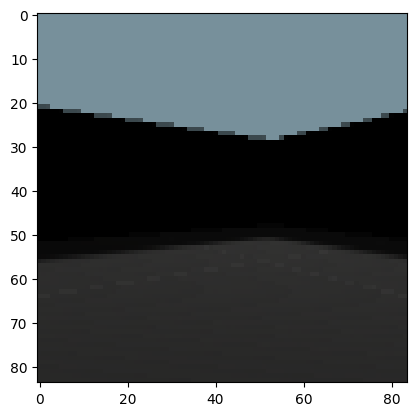

In [30]:
for index, obs_spec in enumerate(spec.observation_specs):
    if len(obs_spec.shape) == 3:
        print("Here is the first visual observation")
        plt.imshow(decision_steps.obs[index][0,:,:,:])
        plt.show()

for index, obs_spec in enumerate(spec.observation_specs):
    if len(obs_spec.shape) == 1:
        print("First vector observations : ", decision_steps.obs[index][0,:])